<a href="https://colab.research.google.com/github/lokashrinav/320HeartDisease/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏃‍♂️🩺 Correlation Between Lifestyle Factors and Heart Disease

_Spring 2025 - CMSC320 Final Project_

**Group Members: Eric Ji, Krishnan Tholkappian, Shrinav Loka**

___

## Contributions

### Eric
- **Project Idea**: Found the heart disease dataset on kaggle.
- **Dataset Curation and Preprocessing**: Mapped 2022 data columns into their matching 2020 columns, also worked on a chi squared test for BMI and heart disease
- **ML Algorithm Design/Development**: tweaked with DecisionTree, Logistic Regression, and XBoost ML algorithms
- **ML Algorithm Training and Test Data Analysis**: Created analysis for how various factors related to heartDisease


### Krishnan
- **Data Exploration and Summary Statistics**: Conducted a t-test to determine whether there was a significant difference in the average sleep time between those with heart disease and those without heart disease, or not
- **ML Algorithm Design/Development**: Tested different ML algorithms and settled on DecisionTree, Logistic Regression, and XBoost due to their ability to address class imbalances
- **ML Algorithm Training and Test Data Analysis**: Applied properties to increase the recall and precision of the models used
- **Visualization, Result Analysis, Conclusion**: Created visualizations for the precision and accuracy of the models used
- **Final Tutorial Report Creation**: Formatted the entire report, made it readable.

### Shrinav
- **Data Exploration and Summary Statistics**: Explored a hypothesis of how general health category has an average sleep time significantly different from the others
- **ML Algorithm Design/Development**: Implemented Logistic Regression to identify which weights sleep correlates to more as sleep increases
- **ML Algorithm Training and Test Data Analysis**: Trained model on sleep time -> general health and analyzed the effect of sleep as it increased
- **Visualization, Result Analysis, Conclusion**: As Sleep Increases, GenHealth increases

___

## Introduction

For this project, our main topic is to understand the various factors that contribute to people getting Heart Disease. As many may know, certain factors, such as smoking and unhealthy lifestyle have some part in causing heart disease. However, we hope to understand to what degrees and also understand if there are other, unknown factors that impact heart health.

As heart disease is one of the most significiant causes of death within the United States - and more importantly within the world in general - understanding to what degree current causes impact heart disease as well as possibly identifiying other factors can help people make better, more informed choices to maximize their chances of avoiding heart disease.

___

## Data Curation

Our data comes from downloading the data from the [Kaggle Heart Disease Dataset](https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease). However, the dataset indicates that the data was created using an aggregate of data from the CDC, with data coming from [2020](https://www.cdc.gov/brfss/annual_data/annual_2020.html) and [2022](https://www.cdc.gov/brfss/annual_data/annual_2022.html). The data was stored in two folders called "2020" and "2022" which each contained .csv files that contained the data for their respective years.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import f_oneway
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, recall_score
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
df2020 = pd.read_csv("heart_2020_cleaned.csv")
df2022 = pd.read_csv("heart_2022_no_nans.csv")

In [ ]:
print(df2020.columns)
print(df2022.columns)
print(df2020.columns.intersection(df2022.columns))

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')
Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLa

___
## Data Transformation
As we can see from the above, which lists the columns in both 2020 and 2022, there is not a perfect match of columns in both name and number. However, we will attempt to map some of the 2022 column names into their matching names in 2020 to attempt to obtain a more comprehensive dataset.

In [ ]:
df2022["KidneyDisease"] = df2022["HadKidneyDisease"]
df2022["SkinCancer"] = df2022["HadSkinCancer"]
df2022["Asthma"] = df2022["HadAsthma"]
df2022["PhysicalActivity"] = df2022["PhysicalActivities"]
df2022["Diabetes"] = df2022["HadDiabetes"]
df2022["SleepTime"] = df2022["SleepHours"]
df2022["GenHealth"] = df2022["GeneralHealth"]
df2022["Race"] = df2022["RaceEthnicityCategory"]
df2022["DiffWalking"] = df2022["DifficultyWalking"]
df2022["PhysicalHealth"] = df2022["PhysicalHealthDays"]
df2022["MentalHealth"] = df2022["MentalHealthDays"]
df2022["Stroke"] = df2022["HadStroke"]
df2022["AlcoholDrinking"] = df2022["AlcoholDrinkers"]
df2022["Smoking"] = df2022["SmokerStatus"]

___
## Data Exploration

### 1. Eric
#### Created a histogram for 2020's AgeCategory, and saw if there was a correlation between BMI and if they had heart disease.

```
Null Hypothesis: There is no association between BMI and Heart Disease

Alternative Hypothesis: There is an association between BMI and Heart Disease

alpha = 0.05
```

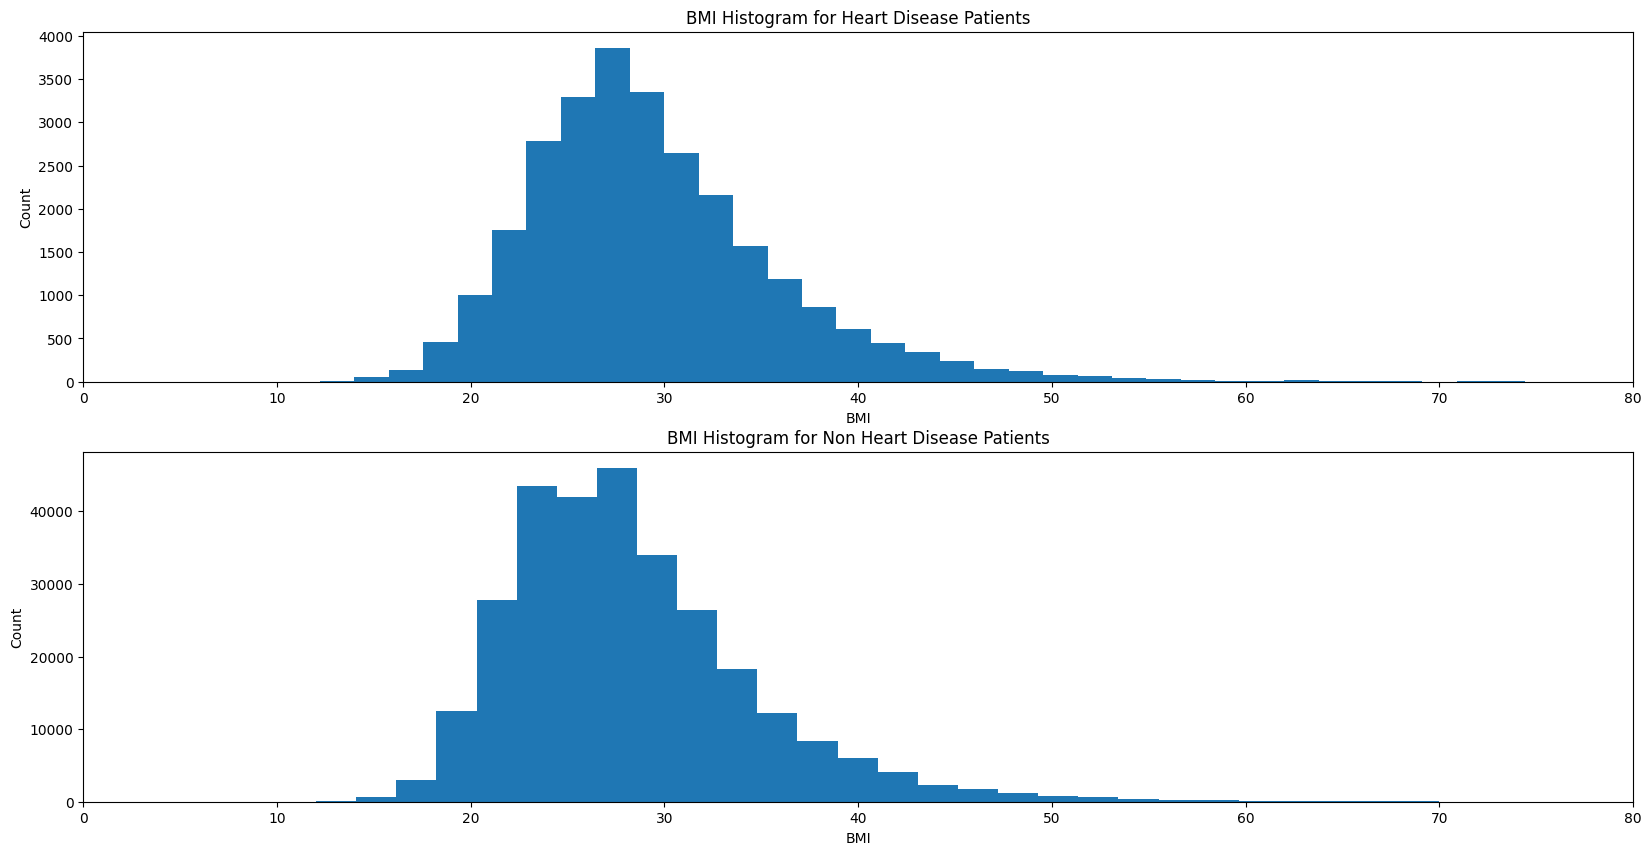

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 10))

ax1.hist(df2020[df2020["HeartDisease"] == "Yes"]["BMI"], bins=40)
ax2.hist(df2020[df2020["HeartDisease"] == "No"]["BMI"], bins=40)

ax1.set_title('BMI Histogram for Heart Disease Patients')
ax2.set_title('BMI Histogram for Non Heart Disease Patients')

for ax in (ax1, ax2):
    ax.set_xlabel("BMI")
    ax.set_ylabel("Count")
    ax.set_xbound(lower=0, upper=80)

In [ ]:
data_crosstab = pd.crosstab(pd.cut(df2020["BMI"], 40), df2020["HeartDisease"])
data_crosstab

HeartDisease,No,Yes
BMI,,
"(11.937, 14.091]",119,14
"(14.091, 16.162]",607,69
"(16.162, 18.232]",2984,237
"(18.232, 20.303]",12437,817
"(20.303, 22.374]",27722,1701
"(22.374, 24.444]",43499,3178
"(24.444, 26.515]",42045,3694
"(26.515, 28.586]",45920,4347
"(28.586, 30.657]",33924,3627


In [ ]:
chi_contingency = scipy.stats.contingency.chi2_contingency(data_crosstab)
chi_contingency

Chi2ContingencyResult(statistic=np.float64(1126.2923927124457), pvalue=np.float64(1.4048700491399771e-211), dof=38, expected_freq=array([[1.21615804e+02, 1.13841961e+01],
       [6.18137469e+02, 5.78625307e+01],
       [2.94529702e+03, 2.75702975e+02],
       [1.21195178e+04, 1.13448222e+03],
       [2.69045248e+04, 2.51847521e+03],
       [4.26816607e+04, 3.99533927e+03],
       [4.18239493e+04, 3.91505073e+03],
       [4.59643730e+04, 4.30262697e+03],
       [3.43368049e+04, 3.21419510e+03],
       [2.67563913e+04, 2.50460874e+03],
       [1.85633266e+04, 1.73767343e+03],
       [1.25730624e+04, 1.17693757e+03],
       [8.58168661e+03, 8.03313388e+02],
       [6.11919518e+03, 5.72804816e+02],
       [4.18705839e+03, 3.91941609e+02],
       [2.44237453e+03, 2.28625473e+02],
       [1.80777778e+03, 1.69222224e+02],
       [1.25730624e+03, 1.17693757e+02],
       [7.89131118e+02, 7.38688816e+01],
       [6.15394256e+02, 5.76057443e+01],
       [3.48388130e+02, 3.26118701e+01],
       [2

#### Conclusion

As we can see from the chi square test, comparing the distribution of BMI's of individuals without heart disease and BMI's of individuals with heart disease, we optain a p-value of 1.404e-211, which is less than our alpha of 0.05. As such we reject the null hypothesis, and conclude that there is an association between heart disease and bmi

### 2. Krishnan

```
Null Hypothesis: There is no significant difference in the average sleep time between people with heart disease and those without heart disease

Alternative Hypothesis: There is a significant difference in the average sleep time between people with heart disease and those without heart disease.

alpha = 0.05
```

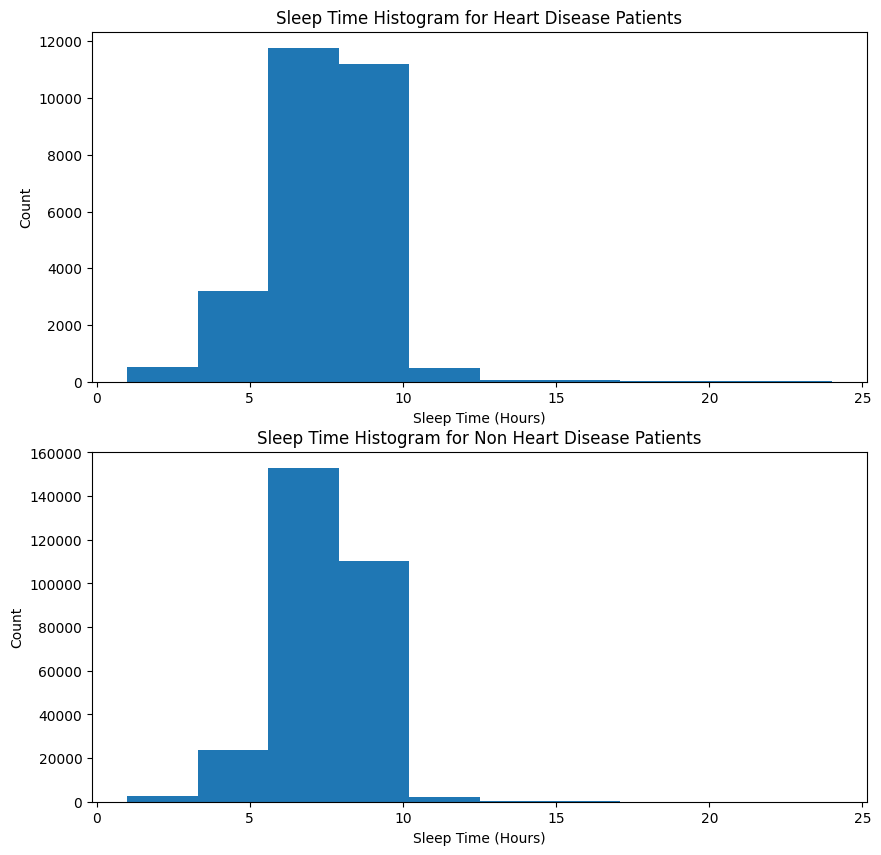

In [ ]:
sleeptime_heart_disease = df2020[df2020["HeartDisease"] == "Yes"]["SleepTime"]
sleeptime_no_heart_disease = df2020[df2020["HeartDisease"] == "No"]["SleepTime"]

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

ax1.hist(sleeptime_heart_disease)
ax2.hist(sleeptime_no_heart_disease)

ax1.set_title('Sleep Time Histogram for Heart Disease Patients')
ax2.set_title('Sleep Time Histogram for Non Heart Disease Patients')

for ax in (ax1, ax2):
    ax.set_xlabel("Sleep Time (Hours)")
    ax.set_ylabel("Count")

#### Explanation
I conducted a t-test to determine whether there was a significant difference in the average sleep time between those with heart disease and those without heart disease, or not. I used a t-test for this hypothesis since I am comparing the same mean values (sleep time) between two independent groups (heart disease and no heart disease). The data meets the normality condition required for the t-test because according to the **Central Limit Theorem**, distributions with greater than 30 samples are normal. The distributions of sleep times for people with and without heart disease have greater than 30 samples each.

In [ ]:
t_test = scipy.stats.ttest_ind(sleeptime_heart_disease, sleeptime_no_heart_disease)
print(f"Test Statistic: {t_test.statistic}")
print(f"P-Value: {t_test.pvalue}")

Test Statistic: 4.7089022884677565
P-Value: 2.4915865758826605e-06


#### Conclusion

Since I obtained a p-value of **2.4915865758826605e-06** from the t-test, which is less than our significance level of 0.05, I reject the null hypothesis. **Therefore, there is a significant difference in the average sleep time between those with heart disease and without heart disease**

### 3. Shrinav

```
Null Hypothesis: There is no difference in average sleep time among different general health categories

Alternative Hypothesis: At least one general health category has an average sleep time significantly different from the others
```

In [ ]:
df = df2020
groups = df.groupby('GenHealth')['SleepTime'].apply(list)

anova = f_oneway(*groups)

print(anova.pvalue)

2.712731102759204e-284


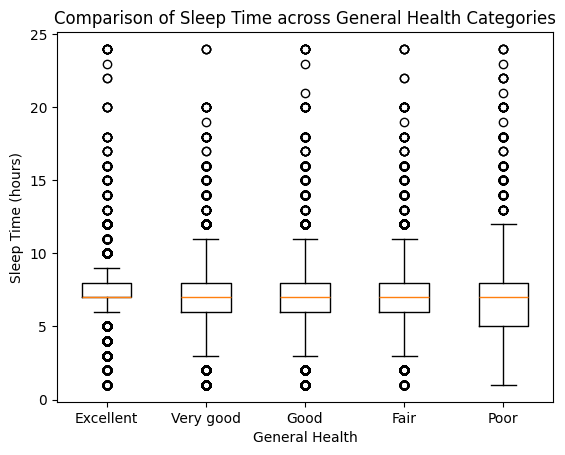

In [ ]:
cats = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
data_to_plot = [df[df['GenHealth'] == category]['SleepTime'] for category in cats]

plt.boxplot(data_to_plot, tick_labels=cats)

plt.title('Comparison of Sleep Time across General Health Categories')
plt.xlabel('General Health')
plt.ylabel('Sleep Time (hours)')
plt.show()


#### Conclusion

Since our p-value is less than 0.05, we reject the null hypothesis, meaning there is a statistically significant difference in average sleep time among the different general health categories. This indicates that at least one general health group differs notably from the others in terms of sleep duration.
___

# Primary Analysis

Now that we have explored the data, we will now move on to applying machine learning onto the data. Our goal will be to predict the probaility of an individual having heart diease based on their information. As there is "no one size fits all" model for machine learning, we will be using a variety of models from KNNs to DecisionTrees, LogisticRegression, and even Gradient Boosted trees.

We will be using the models from Sklearn and XGBoost library. Below, we create all the models and compare their accuracies and f1 scores.

In [ ]:
Y = pd.get_dummies(df2020["HeartDisease"], drop_first=True)
X = pd.get_dummies(df2020[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex',
           'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']], drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42, test_size=0.2)

print(y_train.value_counts())

Yes  
False    234055
True      21781
Name: count, dtype: int64


We can see that the data is highly imbalanced. There are significantly more people without heart disease (False) than with heart disease (True). As a consequence, a machine learning model trained on this data without addressing the imbalance may become biased toward predicting the majority class (people without heart disease). This means the model might predict "No Heart Disease" for most cases, resulting in high overall accuracy but poor performance in identifying individuals who actually have heart disease.

This is extremely problematic since, in a healthcare context, failing to identify a person at risk of heart disease could have serious consequences.

In [ ]:
y_train = y_train['Yes'].map({True: 1, False: 0})

pos = sum(y_train == 1)
neg = sum(y_train == 0)

scale_pos_weight = neg / pos

This computes the class imbalance ratio, or how many times more common the negative class is than the positive class, so that we can account for it when training the XGBoost model.

In [ ]:
models = {
    "DecisionTree": DecisionTreeClassifier(random_state=42, max_depth=5, class_weight='balanced'),
    "LogisticRegression": LogisticRegression(max_iter=1000, class_weight='balanced'),
    "XGBoost": XGBClassifier(max_depth=20, learning_rate=0.5, objective='binary:logistic', scale_pos_weight=scale_pos_weight)
}

We have used the following models since they either have the "class_weight" property or "scale_pos_weight", which helps the model not bias toward the majority class.

In [ ]:
for model_name, model in models.items():

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    threshold = 0.3
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred_adjusted = (y_probs >= threshold).astype(int)

    print(f"{model_name}")

    print(classification_report(y_test, y_pred_adjusted))

DecisionTree
              precision    recall  f1-score   support

       False       0.97      0.54      0.70     58367
        True       0.15      0.81      0.25      5592

    accuracy                           0.57     63959
   macro avg       0.56      0.68      0.47     63959
weighted avg       0.90      0.57      0.66     63959

LogisticRegression
              precision    recall  f1-score   support

       False       0.98      0.45      0.62     58367
        True       0.14      0.90      0.24      5592

    accuracy                           0.49     63959
   macro avg       0.56      0.68      0.43     63959
weighted avg       0.91      0.49      0.59     63959

XGBoost
              precision    recall  f1-score   support

       False       0.93      0.87      0.90     58367
        True       0.19      0.31      0.23      5592

    accuracy                           0.82     63959
   macro avg       0.56      0.59      0.57     63959
weighted avg       0.86      0.82 

We have applied threshold adjustment (from the default of 0.5 to 0.3) to increase the sensitivity of the model, so that it can predict positive cases even with lower confidence, because missing a positive case (false negative) is more dangerous than a false positive.

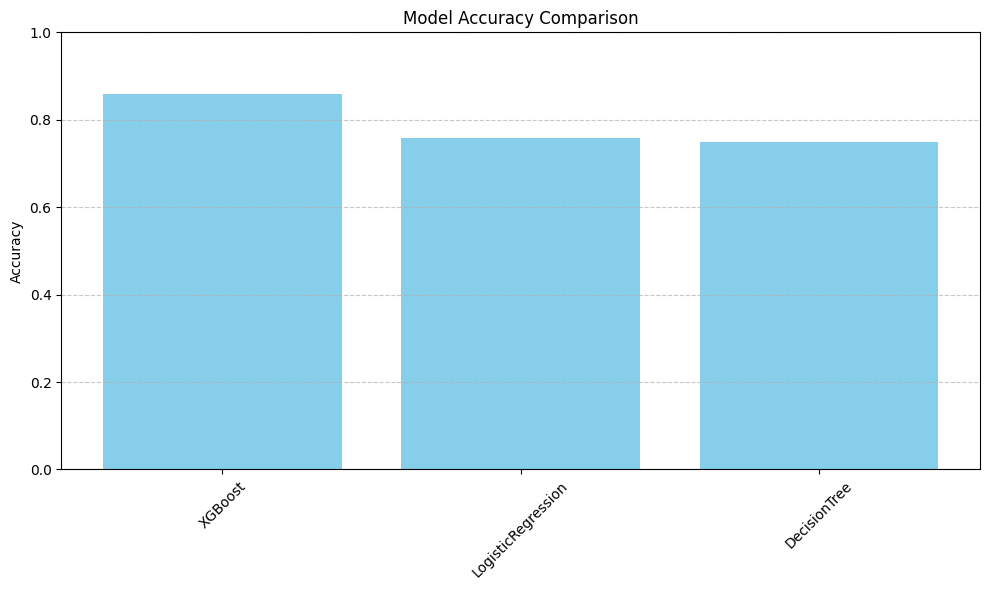

In [ ]:
accuracies = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracies += [[model_name, accuracy]]

sorted_accuracies = dict(sorted(accuracies, key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_accuracies.keys(), sorted_accuracies.values(), color='skyblue')
plt.xticks(rotation=45)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis of Model Accuracy Comparison
All models have high accuracy. However, XGBoost has the highest accuracy since it uses ensemble methods, which captures complex nonlinear relationships

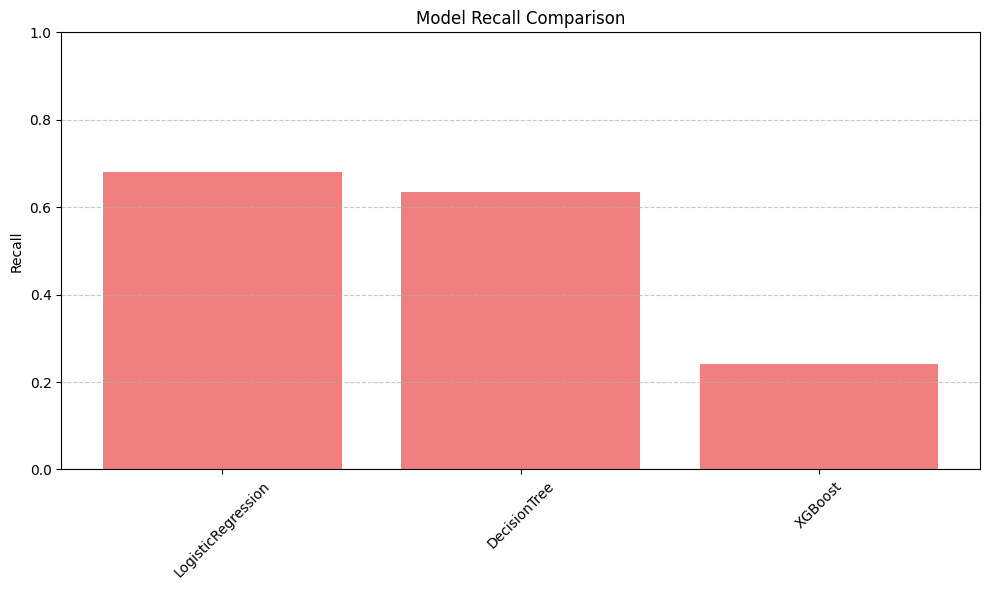

In [ ]:
recalls = []

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    recall = recall_score(y_test, y_pred, average='binary')

    recalls += [[model_name, recall]]

sorted_recalls = dict(sorted(recalls, key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(10, 6))
plt.bar(sorted_recalls.keys(), sorted_recalls.values(), color='lightcoral')
plt.xticks(rotation=45)
plt.ylabel("Recall")
plt.title("Model Recall Comparison")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Analysis of Model Recall Comparison
While XGBoost had the highest accuracy,  it has the lowest recall. This means that it fails to capture people who have heart disease, which may be detrimental to their health. Logistic Regression and Decision Tree have very similar recall values, with Logistic Regression being slightly higher. This indicates that they are much better at identifying those at risk of heart disease

### Conclusion
For health-related predictions, Logistic Regression appears to offer the most balanced performance among the models evaluated. It achieves a strong trade-off between accuracy and recall, making it suitable when the goal is to identify as many true positive cases as possible. This is especially important in medical contexts, where missing a true case can have life-threatening consequences.

While models like XGBoost perform better in terms of overall accuracy, their low recall suggests they may overlook a significant number of positive cases.

When prioritizing patient safety and early detection, Logistic Regression is the most appropriate choice.

___
## Analysis of Logistic Regression

From cofficients of the logistic regression, we can see that of the factors that significantly impact risk of heart disease are their general health score, if they suffered from other issues like strokes, diabetes, kidney disease, and cancer. This also gave some insight into lesser known causes. for example it showed that there is the gender of a person may impact their risk of heart disease as well as what race they were.

In [ ]:
coefficients = models["LogisticRegression"].coef_[0]
features = X.columns

feat_imp = [(feat, imp) for feat, imp in zip(features, coefficients)]
feat_imp.sort(key=lambda x: abs(x[1]), reverse=True)

for feat, imp in feat_imp:
    print(f"Coefficeient of {feat}:{' ' * (20 - len(feat))} {imp}")

Coefficeient of GenHealth_Poor:       2.1600243938136097
Coefficeient of GenHealth_Fair:       1.8166742199998005
Coefficeient of Stroke_Yes:           1.3827570729562535
Coefficeient of GenHealth_Good:       1.3021296561852649
Coefficeient of Diabetic_Yes:         0.7982581317808476
Coefficeient of KidneyDisease_Yes:    0.7783665356914546
Coefficeient of GenHealth_Very good:  0.6615857905086914
Coefficeient of SkinCancer_Yes:       0.6346508799663243
Coefficeient of Sex_Male:             0.6173442682560613
Coefficeient of DiffWalking_Yes:      0.6085428974060364
Coefficeient of Race_Asian:           -0.576266741032911
Coefficeient of AlcoholDrinking_Yes:  -0.4436030560593196
Coefficeient of Diabetic_No, borderline diabetes: 0.43009754812400997
Coefficeient of Smoking_Yes:          0.4274288918921791
Coefficeient of Race_Hispanic:        -0.3611245105735373
Coefficeient of Race_White:           0.20571643401577894
Coefficeient of Race_Black:           -0.19562712970256957
Coefficeient 

___
## Multiclass Health Perception Prediction Using Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score

df = pd.read_csv('heart_2020_cleaned.csv')

health_map = {"Poor": 0, "Fair": 1, "Good": 2, "Very good": 3, "Excellent": 4}
df = df[df["GenHealth"].isin(health_map)]
df["GenHealthNum"] = df["GenHealth"].map(health_map)

num_cols = ["SleepTime", "BMI", "PhysicalHealth", "MentalHealth"]
cat_cols = [
    "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory",
    "Race", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"
]

X = df[num_cols + cat_cols]
y = df["GenHealthNum"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

num_pipe = Pipeline([("scale", StandardScaler())])
cat_pipe = Pipeline([("encode", OneHotEncoder(handle_unknown="ignore"))])

preproc = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols),
])

model = Pipeline([
    ("prep", preproc),
    ("clf", LogisticRegression(
        multi_class="multinomial",
        solver="lbfgs",
        max_iter=1000,
        n_jobs=-1,
    )),
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

coefs = model.named_steps["clf"].coef_[:, 0]
print("SleepTime coefficients by class boundary:")
for i, c in enumerate(coefs):
    print(f"  Class {i}: {c:.3f}")


/Users/krishnan/320env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.451
              precision    recall  f1-score   support

           0       0.53      0.36      0.43      2258
           1       0.44      0.26      0.32      6935
           2       0.44      0.39      0.41     18626
           3       0.45      0.70      0.55     22772
           4       0.46      0.23      0.30     13368

    accuracy                           0.45     63959
   macro avg       0.47      0.39      0.40     63959
weighted avg       0.45      0.45      0.43     63959

[[  815   971   384    84     4]
 [  508  1786  3195  1352    94]
 [  159   952  7227  9202  1086]
 [   34   290  4145 15991  2312]
 [    8    75  1365  8903  3017]]
SleepTime coefficients by class boundary:
  Class 0: -0.046
  Class 1: -0.062
  Class 2: -0.022
  Class 3: 0.029
  Class 4: 0.101


In [ ]:
from sklearn.linear_model import LogisticRegression

X = df[["SleepTime"]]
y = df["GenHealthNum"]

model = LogisticRegression(multi_class="multinomial", max_iter=1000)
model.fit(X, y)

print(model.coef_)

/Users/krishnan/320env/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


[[-0.09432904]
 [-0.05394729]
 [ 0.01577447]
 [ 0.0494006 ]
 [ 0.08310126]]


The chances of being rated Poor or Fair go down

The chances of being rated Good, Very good, or Excellent go up

The strongest upward effect is for “Excellent” (+0.083), meaning more sleep most clearly increases the probability of being in excellent health

Analysis: For each additional hour of sleep, the odds of reporting “Excellent” health instead of lower categories increased by 10%.

The model struggled most with “Poor” and “Excellent” categories likely due to fewer training examples and overlapping lifestyle profiles

That model correctly guessed a person’s self-reported health about 45% of the time.

To learn more about a given topic discussed in this report, check out the following links!
- [KNN](https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn)
- [Decision Tree](https://www.ibm.com/think/topics/decision-trees#:~:text=A%20decision%20tree%20is%20a,internal%20nodes%20and%20leaf%20nodes.)
- [XGBoost](https://xgboost.readthedocs.io/en/release_3.0.0/tutorials/model.html)
- [Precision and Recall](https://builtin.com/data-science/precision-and-recall)
- [Logistic Regression](https://www.ibm.com/think/topics/logistic-regression)